<a href="https://colab.research.google.com/github/jhasubu091/Employee_Attrition_Analysis-/blob/main/Employee__Attrition_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading and importing necessary libraries

In [3]:
#! pip install opendatasets
#import opendatasets as od
#od.download('')

In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
import sklearn
print(sklearn.__version__)

1.4.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [7]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
dataset.shape

(1470, 35)

In [9]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#Data Preprocessing

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
dataset.duplicated().sum()

0

In [13]:
dataset['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
dataset['Attrition'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [15]:
dataset['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [16]:
dataset['OverTime'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [17]:
dataset['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [18]:
dataset['Over18'].replace({'N': 0, 'Y': 1}, inplace=True)

In [19]:
dataset['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [20]:
dataset['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)

In [21]:
dataset['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [22]:
dataset['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [23]:
dataset['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [24]:
dataset['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [25]:
dataset['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [26]:
dataset['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [27]:
dataset['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

In [28]:
dataset['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [29]:
dataset['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [30]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#min-max value

In [31]:
print(dataset['YearsWithCurrManager'].min(),',',dataset['YearsWithCurrManager'].max())

0 , 17


In [32]:
print(dataset['YearsSinceLastPromotion'].min(),',',dataset['YearsSinceLastPromotion'].max())

0 , 15


In [33]:
print(dataset['YearsInCurrentRole'].min(),',',dataset['YearsInCurrentRole'].max())

0 , 18


In [34]:
print(dataset['YearsAtCompany'].min(),',',dataset['YearsAtCompany'].max())

0 , 40


In [35]:
print(dataset['TrainingTimesLastYear'].min(),',',dataset['TrainingTimesLastYear'].max())

0 , 6


In [36]:
print(dataset['TotalWorkingYears'].min(),',',dataset['TotalWorkingYears'].max())

0 , 40


In [37]:
print(dataset['StandardHours'].min(),',',dataset['StandardHours'].max())

80 , 80


In [38]:
print(dataset['PercentSalaryHike'].min(),',',dataset['PercentSalaryHike'].max())

11 , 25


In [39]:
print(dataset['NumCompaniesWorked'].min(),',',dataset['NumCompaniesWorked'].max())

0 , 9


In [40]:
print(dataset['HourlyRate'].min(),',',dataset['HourlyRate'].max())

30 , 100


In [41]:
print(dataset['MonthlyIncome'].min(),',',dataset['MonthlyIncome'].max())

1009 , 19999


In [42]:
print(dataset['MonthlyRate'].min(),',',dataset['MonthlyRate'].max())

2094 , 26999


In [43]:
print(dataset['EmployeeCount'].min(),',',dataset['EmployeeCount'].max())

1 , 1


In [44]:
print(dataset['DistanceFromHome'].min(),',',dataset['DistanceFromHome'].max())

1 , 29


In [45]:
print(dataset['DailyRate'].min(),',',dataset['DailyRate'].max())

102 , 1499


#Data Visualization

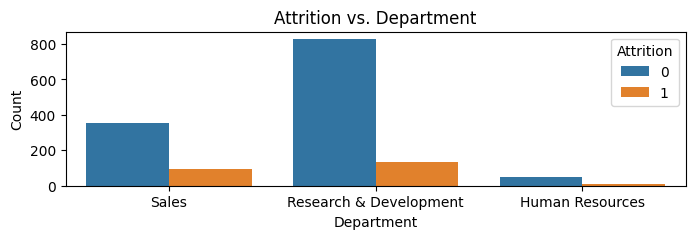

In [46]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.title('Attrition vs. Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

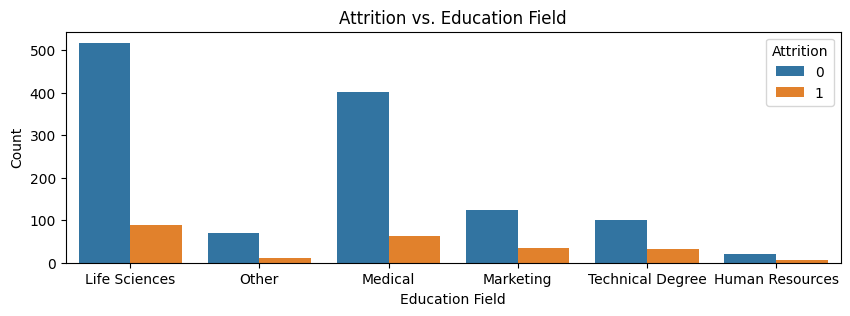

In [47]:
plt.figure(figsize=(10, 3))
sns.countplot(x='EducationField', hue='Attrition', data=dataset)
plt.title('Attrition vs. Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.show()

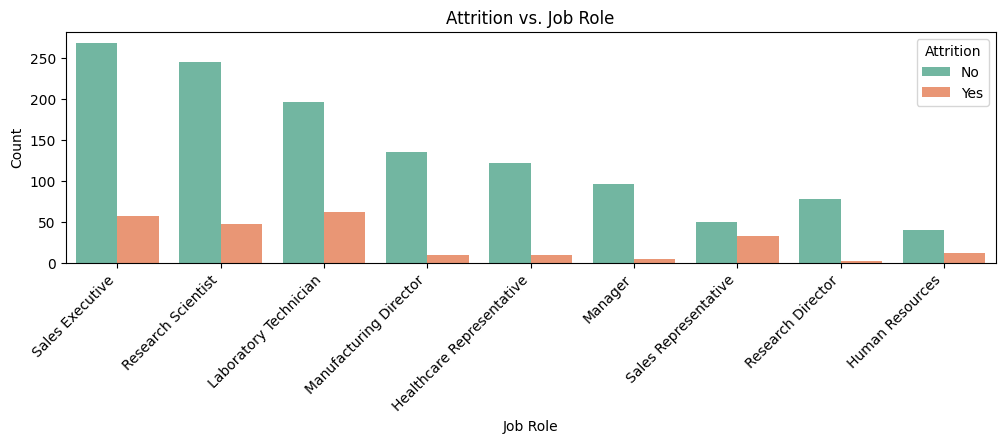

In [48]:
plt.figure(figsize=(12, 3))
sns.countplot(x='JobRole', hue='Attrition', data=dataset, palette='Set2', hue_order=[0, 1])
plt.title('Attrition vs. Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

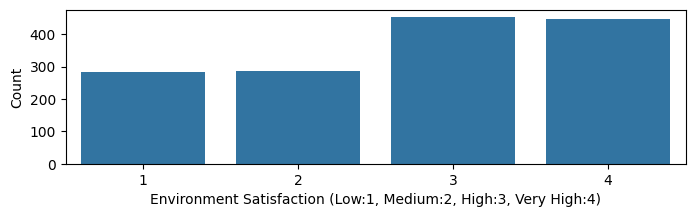

In [49]:
plt.figure(figsize=(8, 2))
sns.countplot(x='EnvironmentSatisfaction', data=dataset)
plt.xlabel('Environment Satisfaction (Low:1, Medium:2, High:3, Very High:4)')
plt.ylabel('Count')
plt.show()

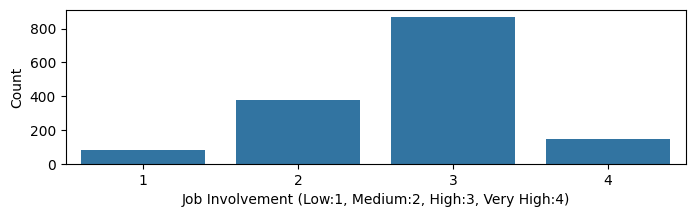

In [50]:
plt.figure(figsize=(8, 2))
sns.countplot(x='JobInvolvement', data=dataset)
plt.xlabel('Job Involvement (Low:1, Medium:2, High:3, Very High:4)')
plt.ylabel('Count')
plt.show()

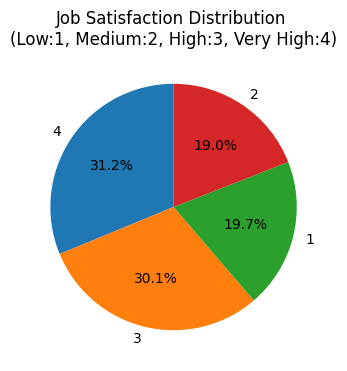

In [51]:
satisfaction_counts = dataset['JobSatisfaction'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Satisfaction Distribution \n(Low:1, Medium:2, High:3, Very High:4)')
plt.show()

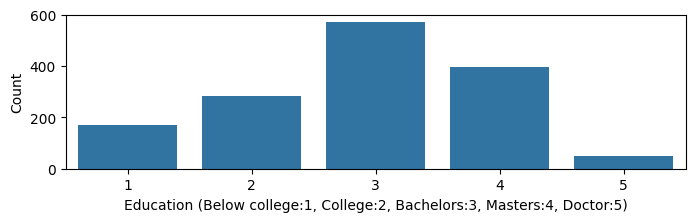

In [52]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Education', data=dataset)
plt.xlabel('Education (Below college:1, College:2, Bachelors:3, Masters:4, Doctor:5)')
plt.ylabel('Count')
plt.show()

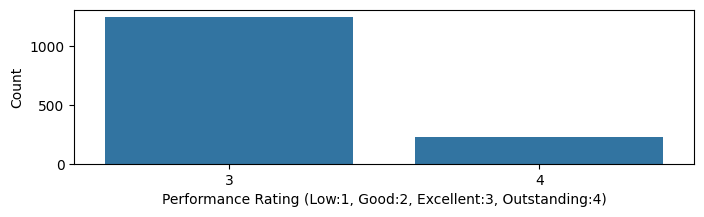

In [53]:
plt.figure(figsize=(8, 2))
sns.countplot(x='PerformanceRating', data=dataset)
plt.xlabel('Performance Rating (Low:1, Good:2, Excellent:3, Outstanding:4)')
plt.ylabel('Count')
plt.show()

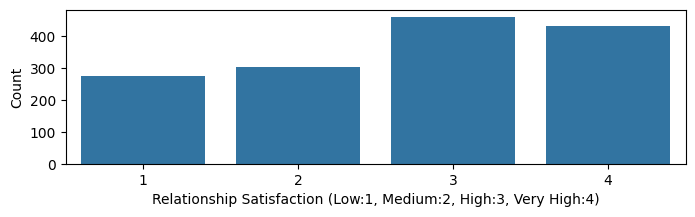

In [54]:
plt.figure(figsize=(8, 2))
sns.countplot(x='RelationshipSatisfaction', data=dataset)
plt.xlabel('Relationship Satisfaction (Low:1, Medium:2, High:3, Very High:4)')
plt.ylabel('Count')
plt.show()

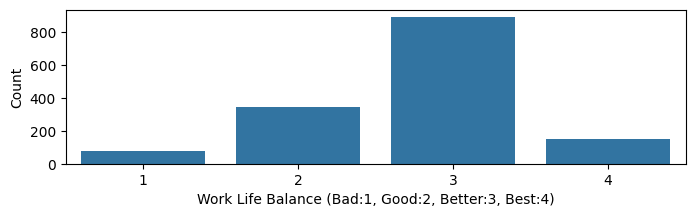

In [55]:
plt.figure(figsize=(8, 2))
sns.countplot(x='WorkLifeBalance', data=dataset)
plt.xlabel('Work Life Balance (Bad:1, Good:2, Better:3, Best:4)')
plt.ylabel('Count')
plt.show()

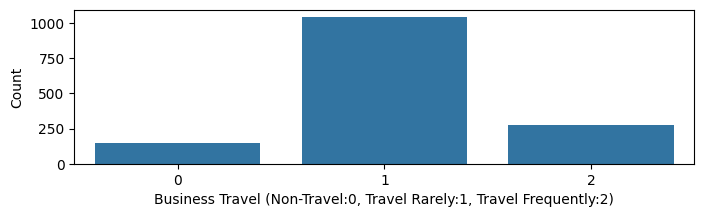

In [56]:
plt.figure(figsize=(8, 2))
sns.countplot(x='BusinessTravel', data=dataset)
plt.xlabel('Business Travel (Non-Travel:0, Travel Rarely:1, Travel Frequently:2)')
plt.ylabel('Count')
plt.show()

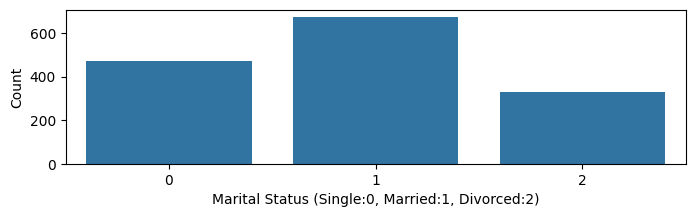

In [57]:
plt.figure(figsize=(8, 2))
sns.countplot(x='MaritalStatus', data=dataset)
plt.xlabel('Marital Status (Single:0, Married:1, Divorced:2)')
plt.ylabel('Count')
plt.show()

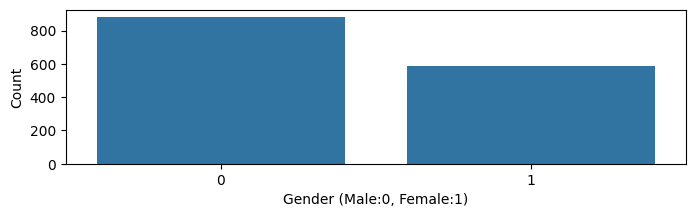

In [58]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Gender', data=dataset)
plt.xlabel('Gender (Male:0, Female:1)')
plt.ylabel('Count')
plt.show()

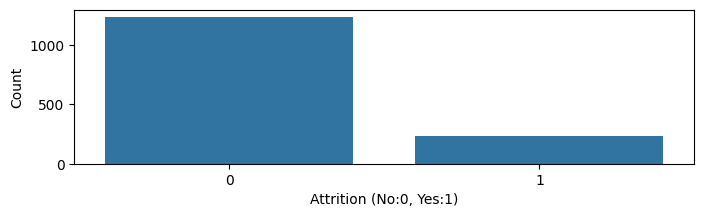

In [59]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Attrition', data=dataset)
plt.xlabel('Attrition (No:0, Yes:1)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Job Satisfaction Across Gender \n (Male:0, Female:1)')

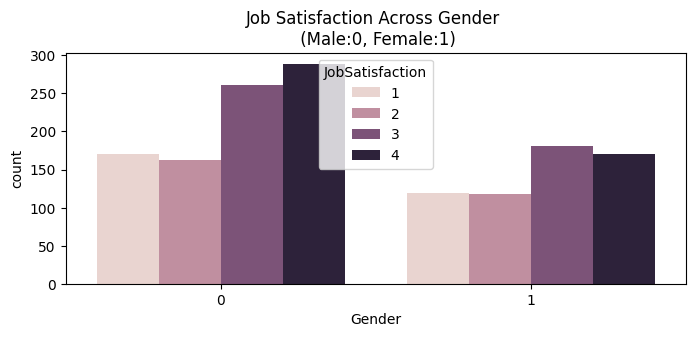

In [60]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Gender', hue='JobSatisfaction', data=dataset)
plt.title('Job Satisfaction Across Gender \n (Male:0, Female:1)')

Text(0.5, 1.0, 'Attrition Across Job Roles')

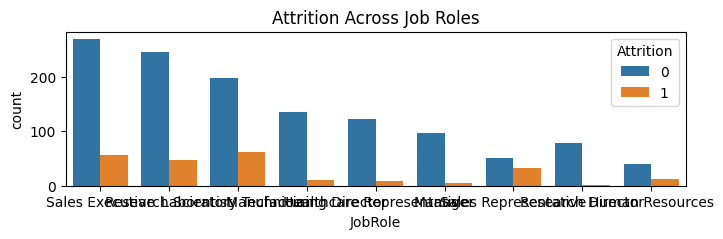

In [61]:
plt.figure(figsize=(8, 2))
sns.countplot(x='JobRole', hue='Attrition', data=dataset)
plt.title('Attrition Across Job Roles')

Text(0.5, 1.0, 'Attrition Across Education Level')

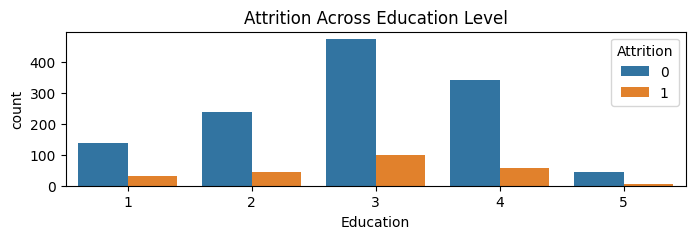

In [62]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Education', hue='Attrition', data=dataset)
plt.title('Attrition Across Education Level')

Text(0.5, 1.0, 'Gender across attrition')

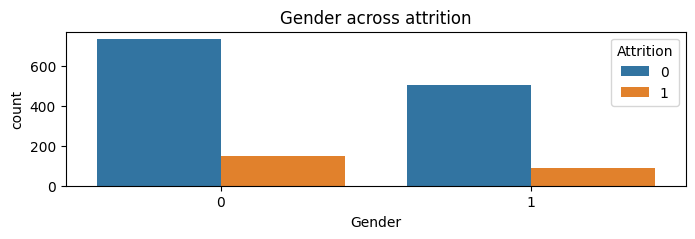

In [63]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Gender', hue='Attrition', data=dataset)
plt.title('Gender across attrition')

Text(0.5, 1.0, 'Count of attrition by department')

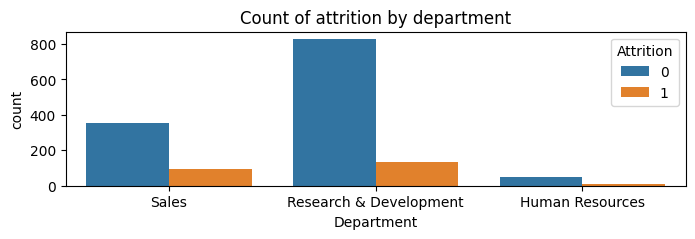

In [64]:
plt.figure(figsize=(8, 2))
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.title('Count of attrition by department')

Text(0.5, 1.0, 'Work life balance across attrition')

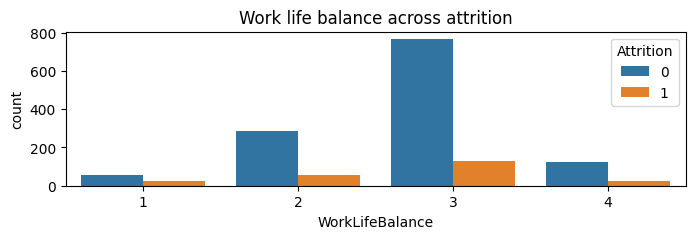

In [65]:
plt.figure(figsize=(8, 2))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=dataset)
plt.title('Work life balance across attrition')

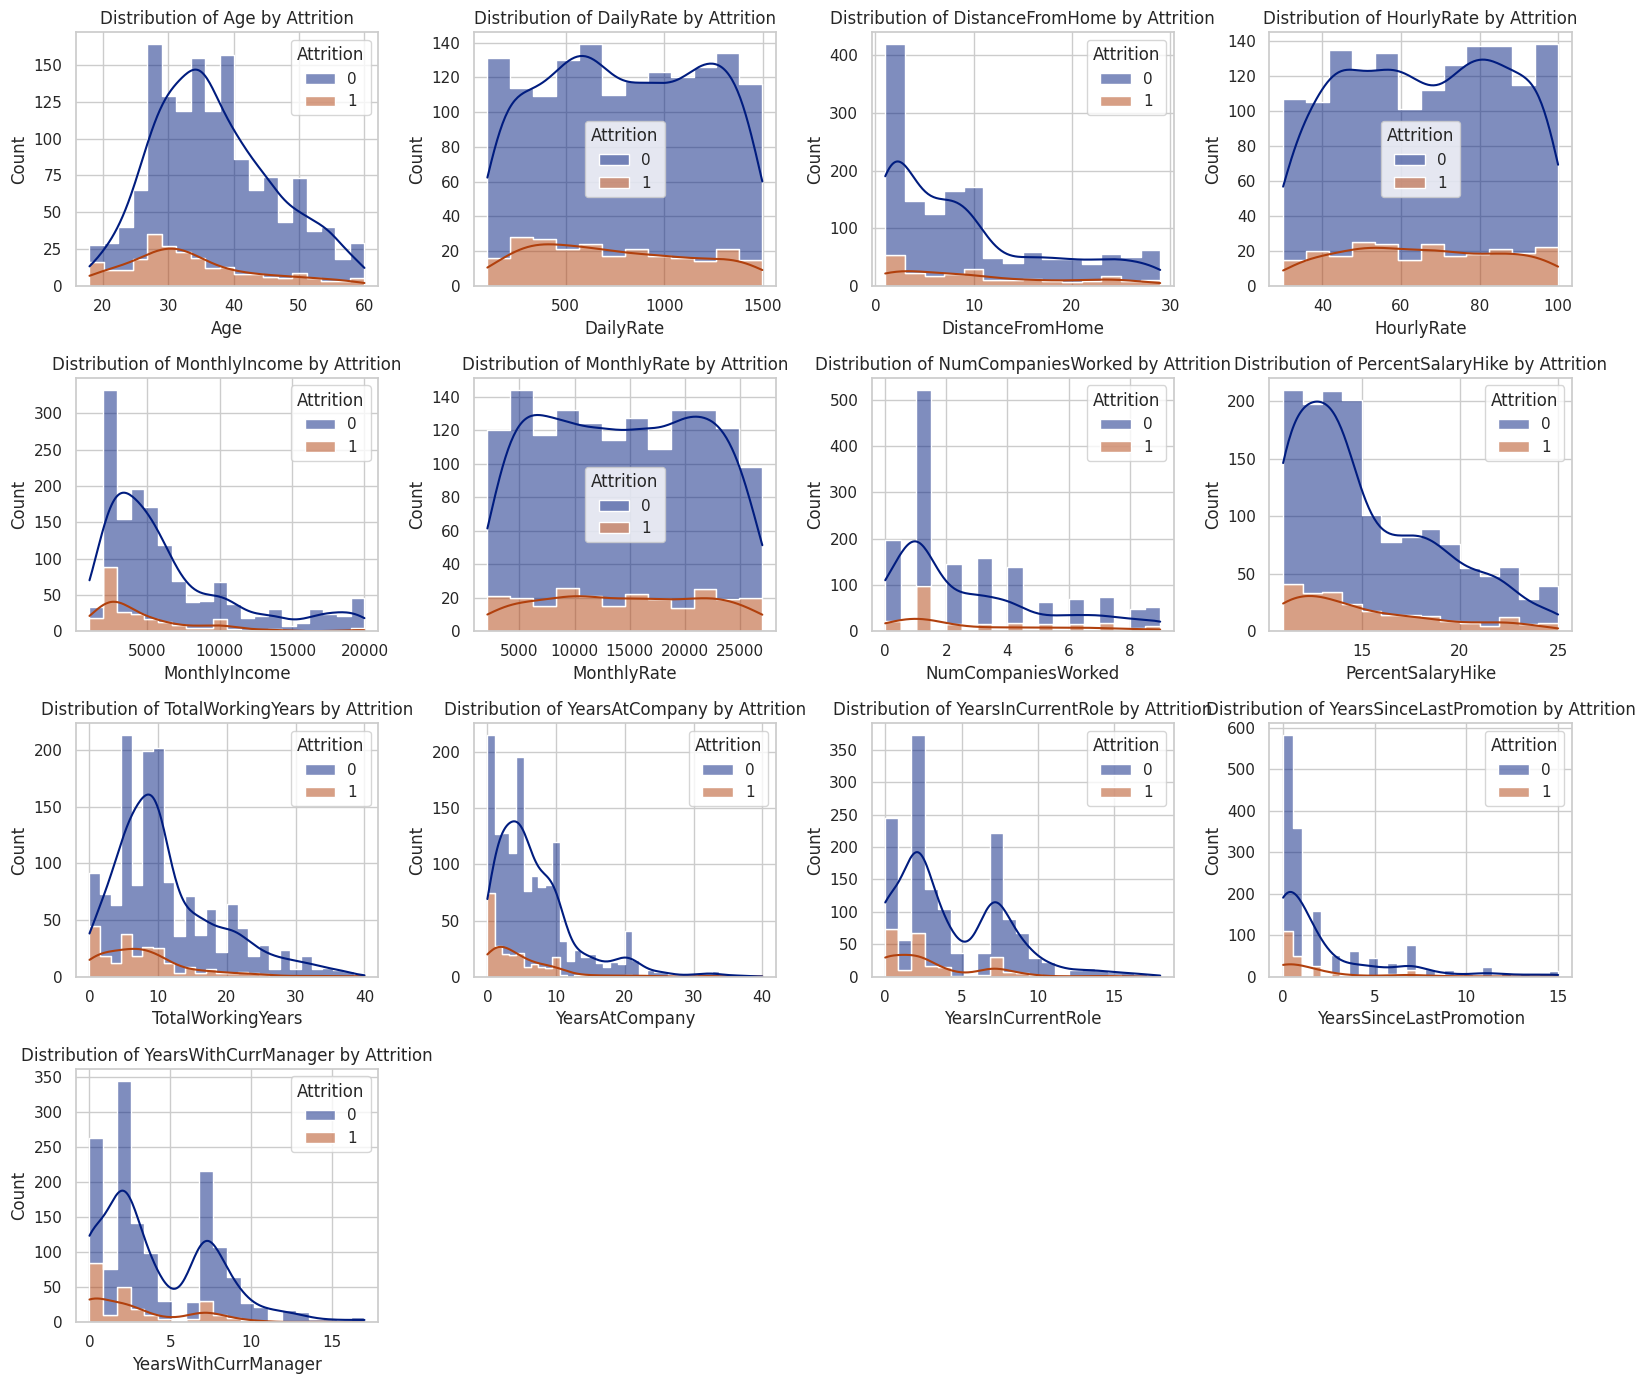

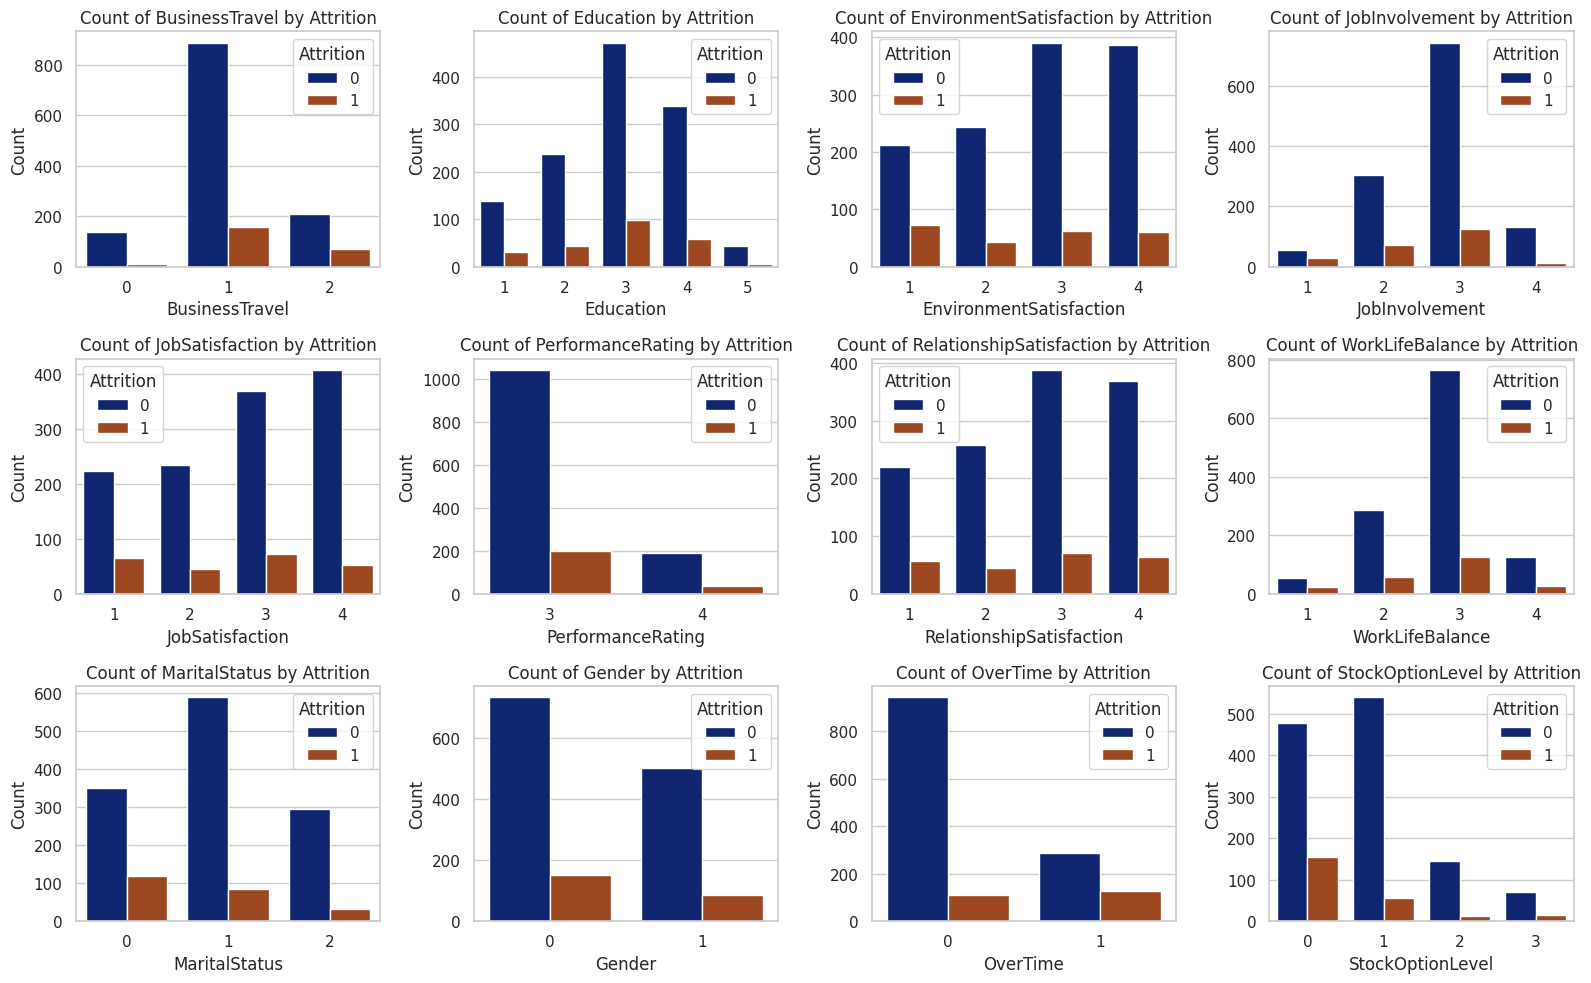

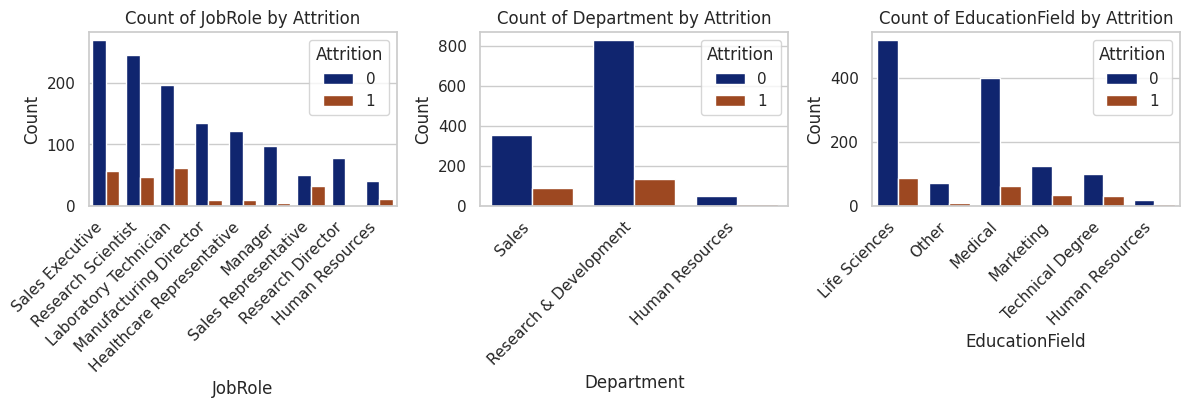

In [66]:
# Set the style of seaborn
sns.set(style="whitegrid", palette="muted")

# Selecting numerical features for plotting
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
                       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Plotting numerical features
plt.figure(figsize=(16, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(x=feature, hue='Attrition', data=dataset, multiple="stack", kde=True, palette="dark", element="step")
    plt.title(f'Distribution of {feature} by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Selecting categorical features for plotting
categorical_features = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                         'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                         'WorkLifeBalance', 'MaritalStatus', 'Gender', 'OverTime','StockOptionLevel']

# Plotting categorical features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Attrition', data=dataset, palette="dark")
    plt.title(f'Count of {feature} by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Selecting categorical features for plotting
other_features = ['JobRole','Department','EducationField']

# Plotting categorical features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(other_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Attrition', data=dataset, palette='dark')
    plt.title(f'Count of {feature} by Attrition')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

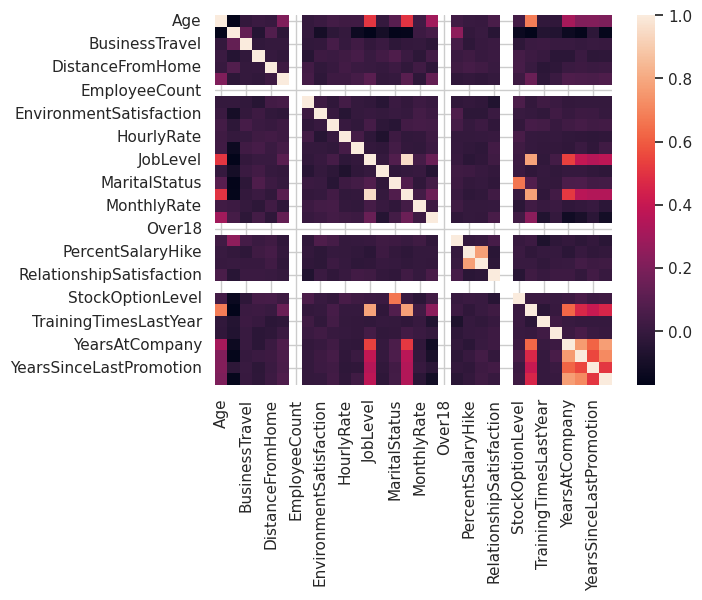

In [75]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_dataset.corr())



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Train Test Spliting

In [76]:
dataset = dataset.drop(['Department','EducationField','JobRole','EmployeeNumber','EmployeeCount'], axis=1)

In [77]:
new_df=dataset.drop(['Attrition'], axis=1)

In [78]:
x = new_df
y = dataset['Attrition']

In [79]:
new_df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1029, 29), (441, 29), (1029,), (441,))

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [85]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [86]:
feature_importances = rfc.feature_importances_
sorted_idx = feature_importances.argsort()

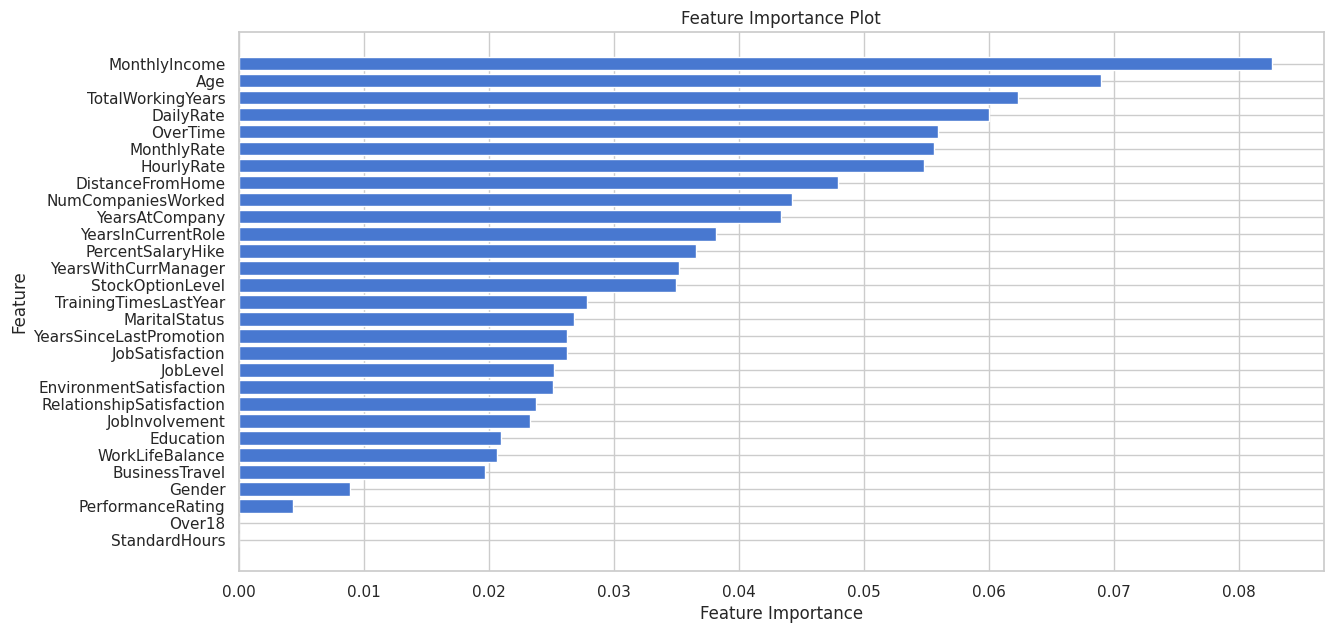

In [87]:
plt.figure(figsize=(14,7))
plt.barh(range(new_df.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(new_df.shape[1]), new_df.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

#Random Forest Classifier

In [88]:
predict=rfc.predict(x_test)

In [89]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [90]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441



In [91]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict))

ROC-AUC Score: 0.5357204486626402


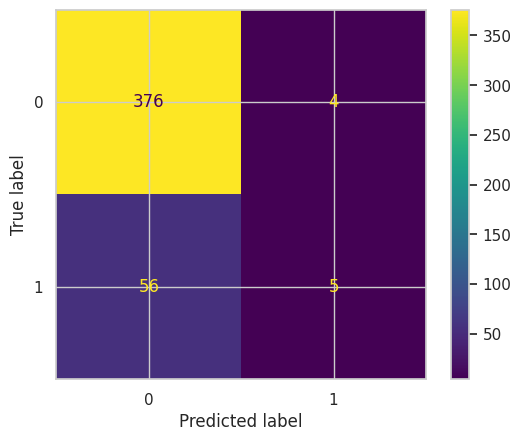

In [92]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict))
cmd.plot()

#Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr_model = LogisticRegression(max_iter=1000)

In [95]:
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [96]:
predict_1=lr_model.predict(x_test)

In [97]:
print("Classification Report:")
print(classification_report(y_test, predict_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       380
           1       0.54      0.11      0.19        61

    accuracy                           0.86       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.83      0.86      0.82       441



In [98]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_1))

ROC-AUC Score: 0.5494823123382225


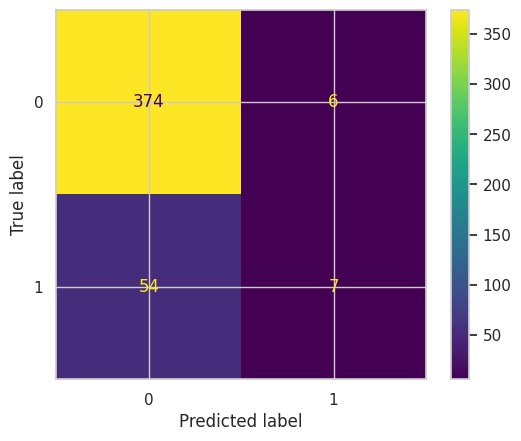

In [99]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_1))
cmd.plot()

#Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [102]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [103]:
predict_2=gbc.predict(x_test)

In [104]:
print("Classification Report:")
print(classification_report(y_test, predict_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.52      0.26      0.35        61

    accuracy                           0.86       441
   macro avg       0.70      0.61      0.64       441
weighted avg       0.84      0.86      0.84       441



In [105]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_2))

ROC-AUC Score: 0.6114106988783434


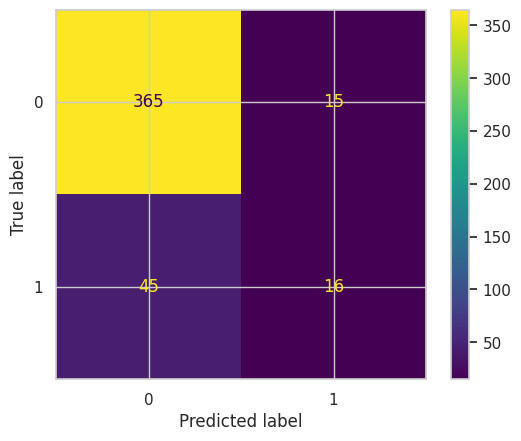

In [106]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_2))
cmd.plot()

#Support Vector Machine

In [107]:
from sklearn import svm

In [108]:
svm_clf = svm.SVC(kernel='linear')

In [109]:
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [110]:
predict_3=svm_clf.predict(x_test)

In [111]:
print("Classification Report:")
print(classification_report(y_test, predict_3))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.50      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.69      0.53      0.53       441
weighted avg       0.82      0.86      0.82       441



In [112]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_3))

ROC-AUC Score: 0.5344046591889561


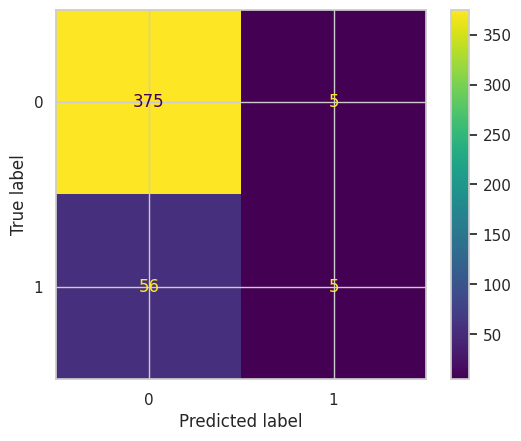

In [113]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_3))
cmd.plot()

#Fine Tuning the hyperparameters of Gradient Boosting Classifier

*Obtained highest Roc-Auc score among all other algorithms applied (0.61).*

In [114]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
gb_clf = GradientBoostingClassifier()

In [117]:
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [118]:
best_params = grid_search.best_params_
print('Best Hyperparameters:', (best_params))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [119]:
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]

In [120]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score:', {roc_auc})

ROC AUC Score: {0.8027178602243313}


#Predictive model

In [121]:
input_data=(40, 1, 45, 30, 4, 1,0, 234,3,3,4,2,34000,2345,7,1,1, 15,3,3,8,3,17,6,3,9,7,5,5)
inputdata_as_nparray=np.asarray(input_data)
inputdata_reshaped=inputdata_as_nparray.reshape(1,-1)
prediction_probability=grid_search.predict_proba(inputdata_reshaped)
prediction=grid_search.predict(inputdata_reshaped)
print(f"No attrition predicted Probability(class 0) = {prediction_probability[0, 0]}")
print(f"Attrition predicted Probability(class 1) = {prediction_probability[0, 1]}")
print(prediction)
if prediction[0]==0:
  print('Attrition = "No"')
else:
  print('Attrition = "Yes"')

No attrition predicted Probability(class 0) = 0.03171943254672438
Attrition predicted Probability(class 1) = 0.9682805674532756
[1]
Attrition = "Yes"


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


#Model Download

In [122]:
import pickle

In [123]:
filename = 'Attrition_Analytics.sav'
pickle.dump(grid_search, open(filename , 'wb'))